<a href="https://colab.research.google.com/github/AryaSuryaaa/Pengembangan-Machine-Learning/blob/main/membuat_Model_banyak_kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# mengubah dataset menjadi pandas dataframe
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Untuk membuang kolom dari dataframe
df = df.drop(columns='Id')

In [ ]:
# melakukan one hot encoding karena label kita merupakan data kategorikal
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values # konversi dataframe tersebut menjadi numpy array
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# memisahkan antara atribut dan label
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [ ]:
# normalisasi data agar data dapat dipelajari dengan baik oleh jst
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True #
callbacks = myCallback()

# hist = model.fit(X_train, Y_train, epochs=100) # sebelum menggunakan callback
hist = model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.1096 - accuracy: 0.6381
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0573 - accuracy: 0.6286
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0148 - accuracy: 0.6190
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9781 - accuracy: 0.6952
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9456 - accuracy: 0.6952
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9155 - accuracy: 0.7048
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8850 - accuracy: 0.7048
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8546 - accuracy: 0.7048
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8234 - accuracy: 0.7048
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7914 - accuracy: 0.7048
Epoch 11/50
4/4 [======================

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4150 - accuracy: 0.8667


[0.4150310158729553, 0.8666666746139526]

In [ ]:
import matplotlib.pyplot as plt

Kemudian dengan objek pyplot kita akan melakukan plot dari objek history. Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model.


 Kode di bawah menunjukkan bagaimana kita bisa membuat plot loss dari model. Untuk mengakses loss kita bisa memanggil fungsi history pada objek history dan memilih metrik los


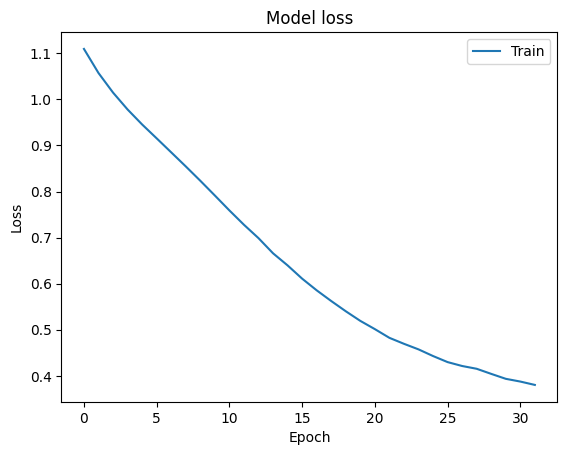

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Untuk membuat plot dari akurasi kita bisa memilih metrik accuracy pada fungsi history. Dari hasil plot di bawah, cek bahwa akurasi model stagnan pada epoch di sekitar 20 dan juga kembali stagnan pada epoch di atas 80.


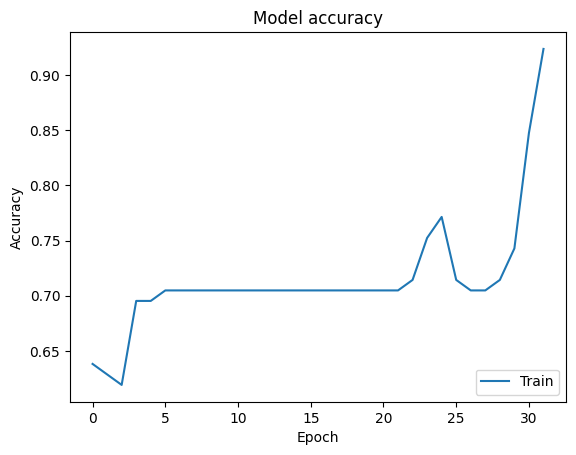

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()